In [19]:
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)


In [20]:
from sklearn import datasets
raw_boston = datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [21]:
X = raw_boston.data
y = raw_boston.target

In [22]:
print(X.shape)

(506, 13)


In [23]:
print(set(y))

{5.0, 6.3, 7.2, 8.8, 7.4, 10.2, 11.8, 12.7, 13.6, 14.5, 15.0, 16.5, 17.5, 18.9, 18.2, 20.4, 21.6, 22.9, 21.7, 24.0, 19.9, 26.6, 26.5, 27.5, 23.1, 27.1, 28.7, 24.7, 30.8, 33.4, 34.7, 34.9, 36.2, 35.4, 31.6, 33.0, 38.7, 33.2, 43.8, 41.3, 37.2, 39.8, 42.3, 48.5, 44.8, 50.0, 46.7, 48.3, 44.0, 48.8, 46.0, 10.5, 11.5, 11.0, 12.5, 12.0, 13.5, 13.0, 14.0, 16.6, 16.0, 16.1, 16.4, 17.4, 17.1, 17.0, 17.6, 17.9, 18.4, 18.6, 18.5, 18.0, 18.1, 19.6, 19.4, 19.5, 19.1, 19.0, 20.0, 20.5, 20.9, 20.6, 20.1, 21.0, 21.4, 21.5, 21.9, 21.1, 22.0, 22.5, 22.6, 22.4, 22.1, 23.4, 23.5, 23.9, 23.6, 23.0, 24.1, 24.6, 24.4, 24.5, 25.0, 25.1, 26.4, 27.0, 27.9, 28.0, 28.4, 28.1, 28.5, 28.6, 29.4, 29.9, 29.6, 29.1, 29.0, 30.5, 30.1, 31.1, 31.5, 31.0, 32.5, 32.0, 32.9, 32.4, 32.2, 33.3, 33.8, 33.1, 32.7, 8.4, 34.6, 35.2, 35.1, 10.4, 10.9, 7.0, 36.4, 36.0, 36.5, 36.1, 11.9, 37.9, 37.0, 37.6, 37.3, 13.9, 13.4, 14.4, 14.9, 15.4, 8.5, 41.7, 42.8, 43.1, 43.5, 45.4, 9.5, 8.3, 8.7, 9.7, 10.8, 11.3, 11.7, 12.3, 12.8, 13.2, 13.

In [24]:
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 0)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

n_feat = X_tn.shape[1]
epo = 30

model = Sequential()
model.add(Dense(20, input_dim = n_feat, activation = 'relu'))
model.add(Dense(1))

In [26]:
model.compile(loss = 'mean_squared_error',
              optimizer = 'adam',
              metrics = ['mean_squared_error'])

In [27]:
hist = model.fit(X_tn, y_tn, epochs = epo, batch_size = 5)

Epoch 1/30
76/76 [==============================] - 1s 2ms/step - loss: 474.8179 - mean_squared_error: 474.8179
Epoch 2/30
76/76 [==============================] - 0s 2ms/step - loss: 97.4737 - mean_squared_error: 97.4737
Epoch 3/30
76/76 [==============================] - 0s 2ms/step - loss: 81.1661 - mean_squared_error: 81.1661
Epoch 4/30
76/76 [==============================] - 0s 2ms/step - loss: 72.6059 - mean_squared_error: 72.6059
Epoch 5/30
76/76 [==============================] - 0s 2ms/step - loss: 63.1071 - mean_squared_error: 63.1071
Epoch 6/30
76/76 [==============================] - 0s 2ms/step - loss: 57.3056 - mean_squared_error: 57.3056
Epoch 7/30
76/76 [==============================] - 0s 2ms/step - loss: 53.3248 - mean_squared_error: 53.3248
Epoch 8/30
76/76 [==============================] - 0s 2ms/step - loss: 48.0304 - mean_squared_error: 48.0304
Epoch 9/30
76/76 [==============================] - 0s 2ms/step - loss: 44.4123 - mean_squared_error: 44.4123
Epoch 10

In [28]:
print(model.evaluate(X_tn, y_tn)[1])

12/12 [==============================] - 0s 2ms/step - loss: 51.5557 - mean_squared_error: 51.5557
51.555728912353516


In [29]:
print(model.evaluate(X_te, y_te)[1])

4/4 [==============================] - 0s 3ms/step - loss: 73.9725 - mean_squared_error: 73.9725
73.97254943847656


In [30]:
import numpy as np
epoch = np.arange(1, epo + 1)
mse = hist.history['mean_squared_error']
print(mse)

[474.8179016113281, 97.47373962402344, 81.16606903076172, 72.60586547851562, 63.107112884521484, 57.30555725097656, 53.32482147216797, 48.03044509887695, 44.41231155395508, 44.624568939208984, 39.88539123535156, 37.467742919921875, 37.21005630493164, 34.65798568725586, 35.224021911621094, 37.2569694519043, 36.62008285522461, 35.410606384277344, 33.90780258178711, 34.473819732666016, 36.57755661010742, 35.879432678222656, 34.44245910644531, 35.37891387939453, 33.260353088378906, 36.97321319580078, 31.00061798095703, 34.85817337036133, 32.476993560791016, 31.69068145751953]


In [31]:
loss = hist.history['loss']
print(loss)

[474.8179016113281, 97.47373962402344, 81.16606903076172, 72.60586547851562, 63.107112884521484, 57.30555725097656, 53.32482147216797, 48.03044509887695, 44.41231155395508, 44.624568939208984, 39.88539123535156, 37.467742919921875, 37.21005630493164, 34.65798568725586, 35.224021911621094, 37.2569694519043, 36.62008285522461, 35.410606384277344, 33.90780258178711, 34.473819732666016, 36.57755661010742, 35.879432678222656, 34.44246292114258, 35.37891387939453, 33.260353088378906, 36.973209381103516, 31.00061798095703, 34.85817337036133, 32.476993560791016, 31.69068145751953]


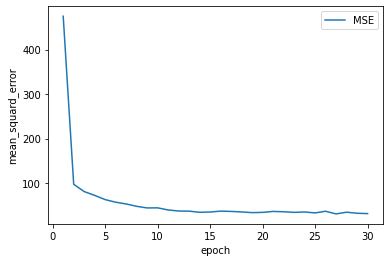

In [35]:
import matplotlib.pyplot as plt
plt.plot(epoch, mse, label = 'MSE')
plt.xlabel('epoch')
plt.ylabel('mean_squard_error')
plt.legend()
plt.show()

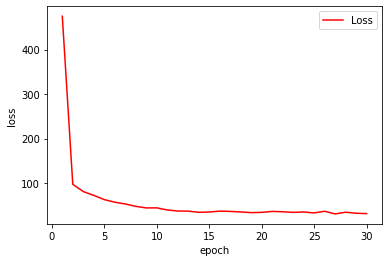

In [36]:
plt.plot(epoch, mse, 'r', label = 'Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [37]:
pred_y = model.predict(X_te).flatten()
print(pred_y)



[14.92687   17.681885  26.267525   7.917672  15.005162  20.334696
 11.6320305 22.128702  13.236664   7.889099   5.1158013  9.617928
 10.792666   2.56197   33.26321   22.726969  13.68999   29.55882
 24.675919  21.299343  22.89376   17.086323  16.023739  26.36598
 21.479933  10.68911   17.37977   11.004324  28.347004  15.011785
 10.714345  12.856977  17.735561  20.255518  24.823114  12.987618
  4.140374  16.951511   6.411767   6.4219604 22.591524  18.943974
 12.9456415  9.773451  17.008007  23.849716  16.26449   14.620793
  7.636937  20.454527   7.7502346 11.073199  18.99207   22.40168
  7.765296  15.407387  17.322489  10.06826   14.9718895 18.075176
 16.16295   18.72122   24.999453  24.195618   9.034815  24.184473
 11.682703  13.9690275  8.437708  20.768137  15.780749  17.593168
 26.88238   23.865866  16.954937  -1.263047  27.122023  20.394745
 23.05681   16.387417  22.719767  17.167488  14.822986  28.526913
 28.235546  21.927986  20.246098   4.790781  24.334215   9.029682
  9.7261095  

In [39]:
print(pred_y.shape)

(127,)


In [38]:
import pandas as pd
res_df = pd.DataFrame(pred_y, columns = ['predict_val'])
res_df['real_val'] = y_te
res_df.head(3)

,predict_val,real_val
0,14.926870,22.6
1,17.681885,50.0
2,26.267525,23.0


In [40]:
df_sort = res_df.sort_values(['predict_val'], ascending = True)
df_sort.head(3)

,predict_val,real_val
116,-3.866297,8.4
96,-3.027407,13.8
75,-1.263047,7.4


Text(0, 0.5, 'value')

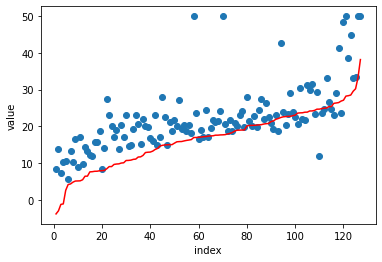

In [41]:
idx = np.arange(1, len(df_sort) + 1)
plt.scatter(idx, df_sort['real_val'], marker = 'o', label = 'real_val')
plt.plot(idx, df_sort['predict_val'], color = 'r', label = 'predict_val')
plt.xlabel('index')
plt.ylabel('value')